In [1]:
import os
import h5py
import numpy as np 

In [2]:
from provabgs import util as UT
from provabgs import models as Models

/Users/chahah/projects/provabgs/src/provabgs/models.py:29: UserWarning: import error with pytorch; cannot use msurv emulator
  warnings.warn('import error with pytorch; cannot use msurv emulator')


In [3]:
# make pretty plots
import corner as DFM
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

In [4]:
m_nmf = Models.NMF(burst=True, emulator=True)

input parameters : logmstar, beta1_sfh, beta2_sfh, beta3_sfh, beta4_sfh, fburst, tburst, gamma1_zh, gamma2_zh, dust1, dust2, dust_index


In [5]:
hpix = h5py.File('/Users/chahah/data/provabgs/provabgs-sv3-bright-26961.BGS_BRIGHT.hdf5', 'r')

In [7]:
mcmc = UT.flatten_chain(hpix['samples'][...][4,:,:,:])
zred = hpix['redshift'][...][4]

In [8]:
logMs = hpix['logMstar'][...][4]

In [9]:
sfr_1gyr = m_nmf.avgSFR(mcmc[:,:-1], zred=zred, dt=1)

In [10]:
Z_mw = m_nmf.Z_MW(mcmc[:,:-1], zred=zred)

In [11]:
tage = m_nmf.tage_MW(mcmc[:,:-1], zred=zred)

In [12]:
posterior = np.vstack([logMs, np.log10(sfr_1gyr), np.log10(Z_mw), tage]).T

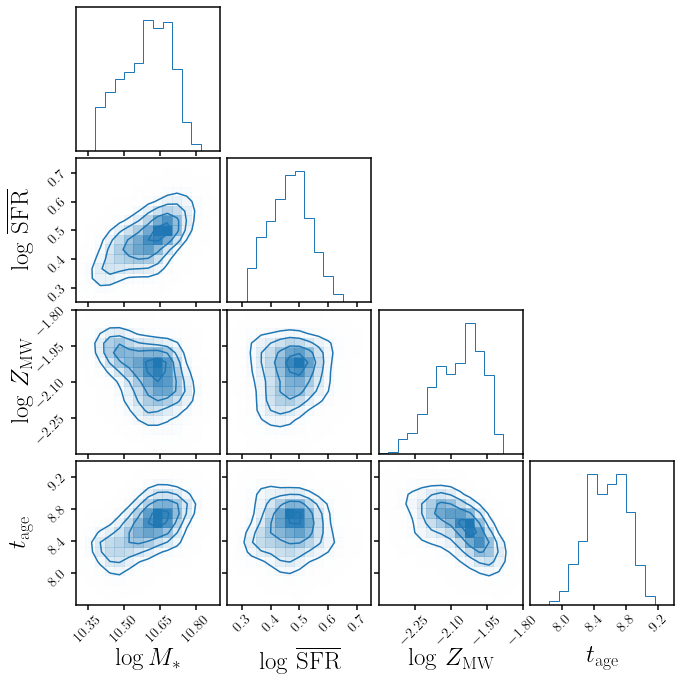

In [16]:
fig = DFM.corner(posterior[-5000:], 
                 range=[(10.3, 10.9), (0.25, 0.75), (-2.4, -1.8), (7.6, 9.4)],
                 labels=[r'$\log M_*$', r'$\log$ $\overline{\rm SFR}$', r'$\log$ $Z_{\rm MW}$', r'$t_{\rm age}$'],
                 label_kwargs={'fontsize': 25},
                 color='C0', bins=15, smooth=True, plot_datapoints=False)